#### Paris Physics Master Numerical Methods -- Exercises Lecture 4

- Name:
- Name:

Import modules and anything else you need

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Deterministic methods of numerical integration

### Simple qudrature rules

In this exercise we are going to implement and investigate the errors of the integration rules seen in class.

We will calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the intervals $[0,1]$ and $[0,3]$

In terms of the error function the integral above is given by:
$$ \int_0^x f(x')dx' = \frac{1}{4} \left(\sqrt{\pi } \;\text{erf}(x)-2 e^{-x^2} x\right) $$
  
the numerical values of the integral for the two intervals are (as  calculated using `MATHEMATICA`)
$$0.1894723458204922$$ and $$0.4429185594236305$$



Let's begin by defining the function
$$ f(x) = x^2 \exp{(-x^2)}$$
and a function to calculate the abolute error
```python
def abs_error(numerical_value, actual_value):
    ...   
    return ...
```

In [3]:
f = lambda x : x**2*np.exp(-x**2)

def abs_error(numerical_value, actual_value):  
    return abs(numerical_value - actual_value)

Plot the function $f(x)$ over the interval $[0,4]$ and label the axes

Text(0, 0.5, '$f(x) = x^2 \\exp{(-x^2)}$')

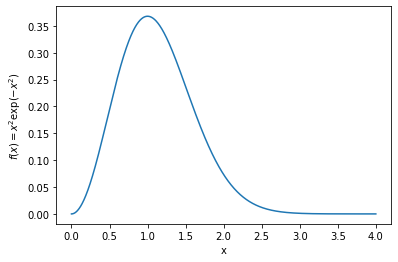

In [4]:
x = np.linspace(0,4,1000)
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('$f(x) = x^2 \exp{(-x^2)}$')

Implement the left, right, mid-point, trapezoidal and Simpson's rules and test them on a simple, analytical integral

In [5]:
h = (x[-1] - x[0])/len(x)
L = lambda x: h * np.sum(f(x[:-1]))
R = lambda x: h * np.sum(f(x[1:]))
M = lambda x: h * np.sum(f((x[:-1] + x[1:]) / 2))
T = lambda x: h * ((f(x[0]) + f(x[-1])) / 2 + np.sum(f(x[1:-1])))
S = lambda x: h * ((f(x[0]) + f(x[-1])) / 2 + np.sum(f(x[1:-1])))

In [6]:
L(x)

0.44267011397446165

In [7]:
R(x)

0.44267012117671284

In [8]:
M(x)

0.4426701176026222

In [9]:
T(x)

0.4426701175755872

In [10]:
S(x)

0.4426701175755872

For each of the five rules, calculate the integral of the function:
    $$ f(x) = x^2 \exp{(-x^2)}   $$
over the interval $[0,1]$ and $[0,3]$ with 100 sub-intervals

Calculate the absolute errors and comment the results

In [11]:
if __name__ == "__main__":
    d1_abs = 0.1894723458204922
    d2_abs = 0.4429185594236305
    x1 = np.linspace(0,1,100)
    x2 = np.linspace(0,3,100)

    print("Errors for range [0,1]\n left:{} \n right:{} \n mid-point:{} \n trapezoidal:{} \n \
Simpson's rules:{}\n\n".format(
        abs_error(d1_abs,L(x1)), 
        abs_error(d1_abs,R(x1)), 
        abs_error(d1_abs,M(x1)),
        abs_error(d1_abs,T(x1)),
        abs_error(d1_abs,S(x1))
        ))
    
    print("Errors for range [0,3]\n left:{} \n right:{} \n mid-point:{} \n trapezoidal:{} \n \
Simpson's rules:{}".format(
        abs_error(d2_abs,L(x2)), 
        abs_error(d2_abs,R(x2)), 
        abs_error(d2_abs,M(x2)),
        abs_error(d2_abs,T(x2)),
        abs_error(d2_abs,S(x2))
        ))

Errors for range [0,1]
 left:0.11517705576634601 
 right:0.11370553800166024 
 mid-point:0.11444129686820446 
 trapezoidal:0.11444129688400313 
 Simpson's rules:0.11444129688400313


Errors for range [0,3]
 left:0.3844555907713287 
 right:0.38445114801838154 
 mid-point:0.38445327967960613 
 trapezoidal:0.38445336939485514 
 Simpson's rules:0.38445336939485514


We are now going to focus on the integration interval $[0,3]$ and compare the absolute error of the 5 rules for an increasing number of sub-intervals $n$ (go up to $n=10000$).

Plot your results (error versus number of sub-intervals) and comment.

It is expected that the error depends on the number of sub-intervals $n$ as
    $$ \epsilon \propto \frac{1}{n^\alpha} $$

Using linear regression, determine the value of $\alpha$ for each of the rules.

Comment your work and results, and do not forget to label your plots.

## Improper integrals

Integrate the improper integral  for $x = 1$
$$ \int_{-\infty}^x \frac{1}{\sqrt{2 \pi}} \exp{(-x^2/2)} \; dx  $$


## Monte Carlo Integration

In this exercise you are going to:

- implement a Monte Carlo integration routine 
- find the integral of $f(x)=x^2$ over the interval $[-2,2]$ 
- study the dependence of the absolute error on the number of samples.

Define the function $f(x) and a function `montecarlo` that returns the integral.

```python
def montecarlo(f,a,b,n):
    """f is function to integrate over the interval [a,b] with n random points"""
    ...
    ...
    return I
```

Calculate the integral and the absolute error, do the same integral with one of the methods you developed earlier. Compare and comment your results.

Study the dependence of the absolute error on the number of random samples $n$ with $n=10\dots10^4$

- For each value of $n$ calculate the integral $N=100$ times and take the mean value $\left< I(n)\right>$.
- Calculate the absolute error with respect to this mean, plot it as a function of $n$.
- Fit the data and remember that the error is expected to be
    $$E \sim \frac{1}{\sqrt{n}}$$
    
- For $N=1000$ and $n=1000$, plot the probability distribution function of $\left< I(n)\right>$. Comment. 